<a href="https://colab.research.google.com/github/kongruige/MedicalImageSegmentation/blob/main/Attempt_with_Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 : Set up colab gpu runtime environment

In [1]:
!pip install segmentation-models-pytorch
!pip install -U git+https://github.com/albumentations-team/albumentations
!pip install --upgrade opencv-contrib-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 KB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 KB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 10.8 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16446 sha256=a7124574a5c88a8ee8a0f22495733ac6b03c58af71512354c9c57efad77ef2be
  Stored in directory: /root/.cache/pip/wheels/84/b9/90/25a0195cf95fb5533db96f1c77ea3f296b7cc86ae8ae48e3dc
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60966 sha256=f83159e1f7478a2f068501a13a30dd2bd8cfd18105efd151a7aa6e021bd207c4
  Stored in directory: /root/.cache/pip/w

This is a library for medical images visualizations

In [2]:
!pip install nibabel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Some Common Imports

In [3]:
import sys
sys.path.append('/content/Human-Segmentation-Dataset-master')

In [4]:
import cv2
import os, glob

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

# 2. Dataset Preparation

In [5]:
from google.colab import drive
drive.mount('/contents')

Mounted at /contents


I have uploaded the dataset onto my google drive. The train-test split is 4:1

In [6]:
dir = '/contents/MyDrive/Colab Notebooks/Project with Dr. Guang Yang/Data/'

# for training
covid_ct_dir = os.path.join(dir,'COVID-19-CT-Seg_20cases/covid/train/')
infection_mask_dir = os.path.join(dir,'Infection_Mask/covid/train/')
lung_and_infection_mask_dir = os.path.join(dir,'Lung_and_Infection_Mask/covid/train/')
lung_mask_dir = os.path.join(dir,'Lung_Mask/covid/train/')

# for testing
covid_ct_dir_test = os.path.join(dir,'COVID-19-CT-Seg_20cases/covid/test/')
infection_mask_dir_test = os.path.join(dir,'Infection_Mask/covid/test/')
lung_and_infection_mask_dir_test = os.path.join(dir,'Lung_and_Infection_Mask/covid/test/')
lung_mask_dir_test = os.path.join(dir,'Lung_Mask/covid/test/')

I will also define some output path where images will be saved

In [7]:
# for training
covid_ct_output = os.path.join(dir, 'covid_ct_output/')
lung_mask_output = os.path.join(dir, 'lung_mask_output/')
lung_and_infection_mask_output = os.path.join(dir, 'lung_and_infection_mask_output/')
infection_mask_output = os.path.join(dir, 'infection_mask_output/')

# for testing
covid_ct_output_test = os.path.join(dir, 'covid_ct_output_test/')
lung_mask_output_test = os.path.join(dir, 'lung_mask_output_test/')
lung_and_infection_mask_output_test = os.path.join(dir, 'lung_and_infection_mask_output_test/')
infection_mask_output_test = os.path.join(dir, 'infection_mask_output_test/')

Visualizing the Data:

I will visualize the ct scans in the four folders `COVID-19-CT-Seg_20cases`, `Infection_Mask`, `Lung_and_Infection_Mask`, and `Lung_Mask`. For simplicity, I will only visualize along the z axis, although the same can be done on the x and y axis as well

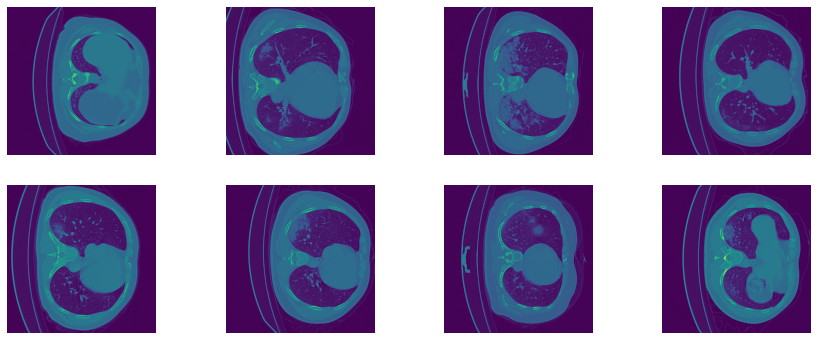

(512, 512)


In [8]:

import nibabel as nib
import matplotlib.pyplot as plt

np.random.seed(231)
# selecting a random slice in the third dimension
slice = np.random.randint(0,301)

fig, axs = plt.subplots(2, 4, figsize = (15, 6))

for i in range(1,9):
  file_name = 'coronacases_00' + str(i) + '.nii'
  file_path = os.path.join(covid_ct_dir,file_name)
  img = nib.load(file_path)
  img_data = img.get_fdata()
  axs[(i-1)//4, (i-1)%4].imshow(img_data[:,:,slice])
  axs[(i-1)//4, (i-1)%4].axis('off')
plt.show()
print(img_data[:,:,slice].shape)

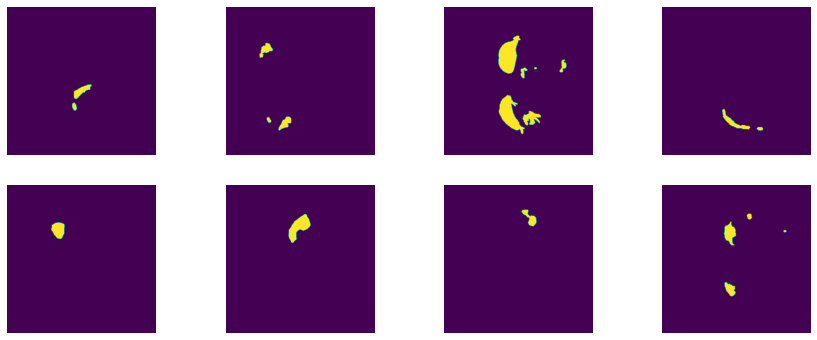

In [9]:

fig, axs = plt.subplots(2, 4, figsize = (15, 6))

for i in range(1,9):
  file_name = 'coronacases_00' + str(i) + '.nii'
  file_path = os.path.join(infection_mask_dir,file_name)
  img = nib.load(file_path)
  img_data = img.get_fdata()
  axs[(i-1)//4, (i-1)%4].imshow(img_data[:,:,slice])
  axs[(i-1)//4, (i-1)%4].axis('off')
plt.show()

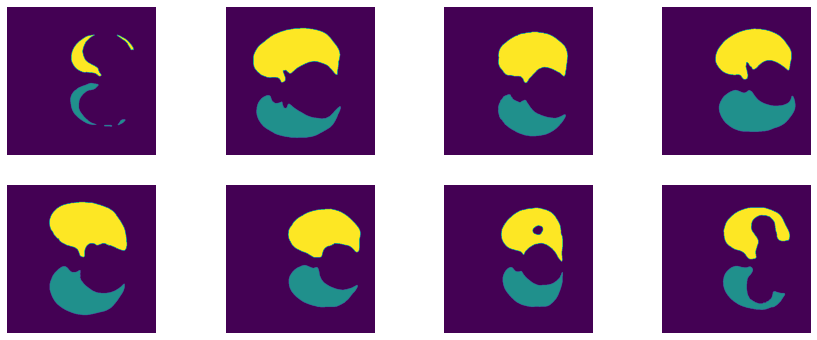

In [10]:

fig, axs = plt.subplots(2, 4, figsize = (15, 6))

for i in range(1,9):
  file_name = 'coronacases_00' + str(i) + '.nii'
  file_path = os.path.join(lung_mask_dir,file_name)
  img = nib.load(file_path)
  img_data = img.get_fdata()
  axs[(i-1)//4, (i-1)%4].imshow(img_data[:,:,slice])
  axs[(i-1)//4, (i-1)%4].axis('off')
plt.show()

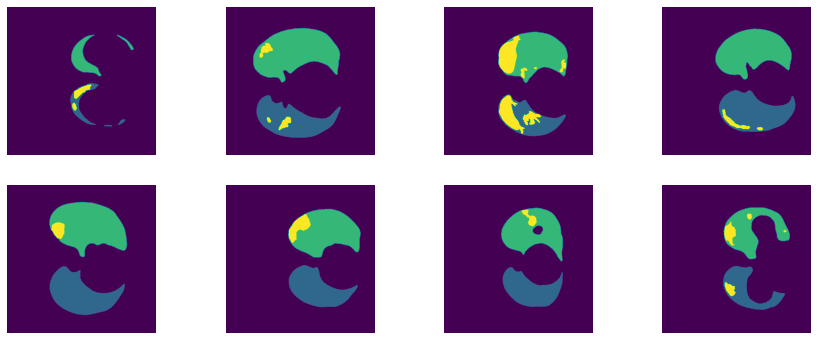

In [11]:

fig, axs = plt.subplots(2, 4, figsize = (15, 6))

for i in range(1,9):
  file_name = 'coronacases_00' + str(i) + '.nii'
  file_path = os.path.join(lung_and_infection_mask_dir,file_name)
  img = nib.load(file_path)
  img_data = img.get_fdata()
  axs[(i-1)//4, (i-1)%4].imshow(img_data[:,:,slice])
  axs[(i-1)//4, (i-1)%4].axis('off')
plt.show()

Next I will visualize 20 frames of one particular scan to see the changes in the z axis.

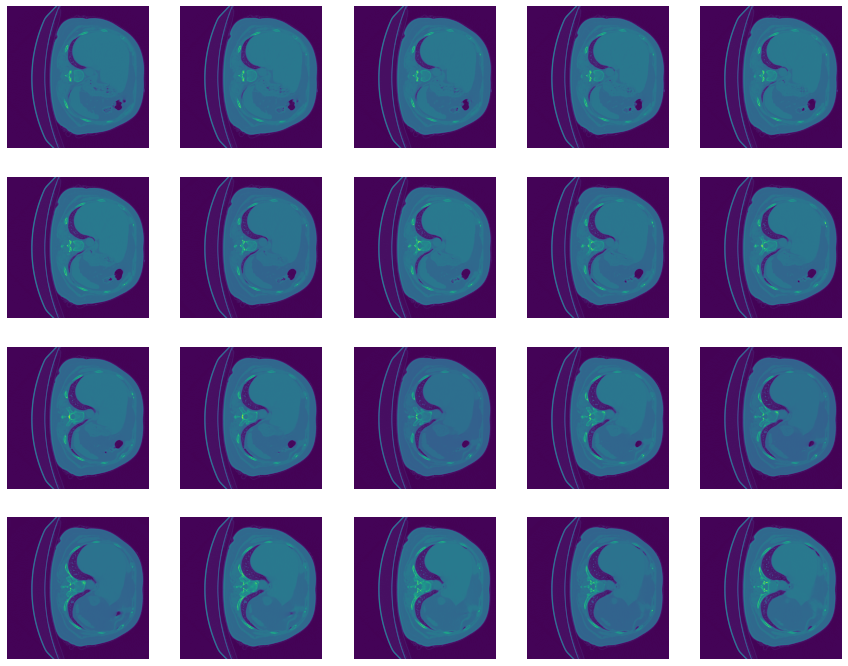

In [12]:

fig, axs = plt.subplots(4, 5, figsize = (15, 12))

file_name = 'coronacases_001.nii'
file_path = os.path.join(covid_ct_dir,file_name)
img = nib.load(file_path)
img_data = img.get_fdata()

np.random.seed(204)
random_start = np.random.randint(0,291)

for i in range(1,21):
  axs[(i-1)//5, (i-1)%5].imshow(img_data[:,:,random_start + i])
  axs[(i-1)//5, (i-1)%5].axis('off')
plt.show()

In [13]:
np.min(img_data), np.max(img_data), img_data.shape, type(img_data)

(-1021.0, 2996.0, (512, 512, 301), numpy.memmap)

Notice that the min and max values are significantly different. Hence, I will introduce a normalization function for easier training.

Define constants

In [14]:
HOUNSFIELD_MIN = -1000
HOUNSFIELD_MAX = 3000
HOUNSFIELD_RANGE = HOUNSFIELD_MAX-HOUNSFIELD_MIN

slice_x = False
slice_y = False
slice_z = True

SLICE_DECIMATE_IDENTIFIER = 3

In [15]:
def normalizeImageIntensityRange(img):
  img[img < HOUNSFIELD_MIN] = HOUNSFIELD_MIN
  img[img > HOUNSFIELD_MAX] = HOUNSFIELD_MAX
  return (img - HOUNSFIELD_MIN) / HOUNSFIELD_RANGE

In [16]:
nimg = normalizeImageIntensityRange(img_data)
np.min(nimg), np.max(nimg), nimg.shape, type(nimg)

(0.0, 0.999, (512, 512, 301), numpy.ndarray)

We now have the values between 0 and 1. Next we will create a function to read in the image volumes

In [17]:
def readImageVolume(imgpath, normalize = False):
  img = nib.load(imgpath).get_fdata()
  if normalize:
    return normalizeImageIntensityRange(img)
  else:
    return img

In [18]:
readImageVolume(file_path, normalize = False), readImageVolume(file_path, normalize = True)

(memmap([[[-998., -998., -999., ..., -998., -998., -998.],
          [-998., -998., -999., ..., -998., -998., -998.],
          [-998., -998., -999., ..., -998., -998., -998.],
          ...,
          [-998., -999., -998., ..., -998., -998., -998.],
          [-998., -999., -998., ..., -998., -998., -998.],
          [-998., -999., -998., ..., -998., -998., -998.]],
 
         [[-998., -998., -999., ..., -998., -998., -998.],
          [-998., -998., -999., ..., -998., -998., -998.],
          [-998., -998., -999., ..., -998., -998., -998.],
          ...,
          [-998., -999., -998., ..., -998., -998., -998.],
          [-998., -999., -998., ..., -998., -998., -998.],
          [-998., -999., -998., ..., -998., -998., -998.]],
 
         [[-998., -998., -999., ..., -998., -998., -998.],
          [-998., -998., -999., ..., -998., -998., -998.],
          [-998., -998., -999., ..., -998., -998., -998.],
          ...,
          [-998., -999., -998., ..., -998., -998., -998.],
     

Notice that we do NOT want to normalize the Label Mask volume and hence we only normalize the unlabelled images. Next we define a function to save image slice to file

In [19]:
def saveSlice(img, fname, path):
  img = np.uint8(img * 255)
  fout = os.path.join(path, f'{fname}.png')
  cv2.imwrite(fout, img)
  print(f'[*] Slice saved: {fout}', end='\r') # write the same line

In [20]:
def saveSlice_rgb(img, fname, path):
  img = cv2.cvtColor(np.uint8(img * 255),cv2.COLOR_GRAY2RGB)
  fout = os.path.join(path, f'{fname}.png')
  cv2.imwrite(fout, img)
  print(f'[*] Slice saved: {fout}', end='\r') # write the same line

In [21]:
def sliceAndSaveVolumeImage(vol, fname, path):
  dimx, dimy, dimz = vol.shape

  cnt = 0

  if slice_x:
    cnt += dimx
    print('slicing x: ')
    for i in range(dimx):
      saveSlice(vol[i,:,:], fname + f'-slice{str(i).zfill(SLICE_DECIMATE_IDENTIFIER)}_x', path)

  if slice_y:
    cnt += dimy
    print('slicing y: ')
    for i in range(dimy):
      saveSlice(vol[:,i,:], fname + f'-slice{str(i).zfill(SLICE_DECIMATE_IDENTIFIER)}_y', path)

  if slice_z:
    cnt += dimz
    print('slicing z: ')
    for i in range(dimz):
      saveSlice(vol[:,:,i], fname + f'-slice{str(i).zfill(SLICE_DECIMATE_IDENTIFIER)}_z', path)
  
  return cnt


In [22]:
def sliceAndSaveVolumeImage_rgb(vol, fname, path):
  dimx, dimy, dimz = vol.shape

  cnt = 0

  if slice_x:
    cnt += dimx
    print('slicing x: ')
    for i in range(dimx):
      saveSlice_rgb(vol[i,:,:], fname + f'-slice{str(i).zfill(SLICE_DECIMATE_IDENTIFIER)}_x', path)

  if slice_y:
    cnt += dimy
    print('slicing y: ')
    for i in range(dimy):
      saveSlice_rgb(vol[:,i,:], fname + f'-slice{str(i).zfill(SLICE_DECIMATE_IDENTIFIER)}_y', path)

  if slice_z:
    cnt += dimz
    print('slicing z: ')
    for i in range(dimz):
      saveSlice_rgb(vol[:,:,i], fname + f'-slice{str(i).zfill(SLICE_DECIMATE_IDENTIFIER)}_z', path)
  
  return cnt

For this particular illustration, I will train using only the `infection_mask`

In [23]:
for index, filename in enumerate(sorted(glob.glob(covid_ct_dir+'*.nii'))):
  img = readImageVolume(filename, True)
  print(filename, img.shape, np.sum(img.shape), np.min(img), np.max(img))
  numOfSlices = sliceAndSaveVolumeImage(img, 'tooth'+str(index), covid_ct_output)
  print(f'\n{filename}, {numOfSlices} slices created \n')

/contents/MyDrive/Colab Notebooks/Project with Dr. Guang Yang/Data/COVID-19-CT-Seg_20cases/covid/train/coronacases_001.nii (512, 512, 301) 1325 0.0 0.999
slicing z: 
[*] Slice saved: /contents/MyDrive/Colab Notebooks/Project with Dr. Guang Yang/Data/covid_ct_output/tooth0-slice300_z.png
/contents/MyDrive/Colab Notebooks/Project with Dr. Guang Yang/Data/COVID-19-CT-Seg_20cases/covid/train/coronacases_001.nii, 301 slices created 

/contents/MyDrive/Colab Notebooks/Project with Dr. Guang Yang/Data/COVID-19-CT-Seg_20cases/covid/train/coronacases_002.nii (512, 512, 200) 1224 0.0 1.0
slicing z: 
[*] Slice saved: /contents/MyDrive/Colab Notebooks/Project with Dr. Guang Yang/Data/covid_ct_output/tooth1-slice199_z.png
/contents/MyDrive/Colab Notebooks/Project with Dr. Guang Yang/Data/COVID-19-CT-Seg_20cases/covid/train/coronacases_002.nii, 200 slices created 

/contents/MyDrive/Colab Notebooks/Project with Dr. Guang Yang/Data/COVID-19-CT-Seg_20cases/covid/train/coronacases_003.nii (512, 512, 20

In [24]:
for index, filename in enumerate(sorted(glob.glob(infection_mask_dir+'*.nii'))):
  img = readImageVolume(filename, False)
  print(filename, img.shape, np.sum(img.shape), np.min(img), np.max(img))
  numOfSlices = sliceAndSaveVolumeImage(img, 'tooth'+str(index), infection_mask_output)
  print(f'\n{filename}, {numOfSlices} slices created \n')

/contents/MyDrive/Colab Notebooks/Project with Dr. Guang Yang/Data/Infection_Mask/covid/train/coronacases_001.nii (512, 512, 301) 1325 0.0 1.0
slicing z: 
[*] Slice saved: /contents/MyDrive/Colab Notebooks/Project with Dr. Guang Yang/Data/infection_mask_output/tooth0-slice300_z.png
/contents/MyDrive/Colab Notebooks/Project with Dr. Guang Yang/Data/Infection_Mask/covid/train/coronacases_001.nii, 301 slices created 

/contents/MyDrive/Colab Notebooks/Project with Dr. Guang Yang/Data/Infection_Mask/covid/train/coronacases_002.nii (512, 512, 200) 1224 0.0 1.0
slicing z: 
[*] Slice saved: /contents/MyDrive/Colab Notebooks/Project with Dr. Guang Yang/Data/infection_mask_output/tooth1-slice199_z.png
/contents/MyDrive/Colab Notebooks/Project with Dr. Guang Yang/Data/Infection_Mask/covid/train/coronacases_002.nii, 200 slices created 

/contents/MyDrive/Colab Notebooks/Project with Dr. Guang Yang/Data/Infection_Mask/covid/train/coronacases_003.nii (512, 512, 200) 1224 0.0 1.0
slicing z: 
[*] Sli

In [25]:
for index, filename in enumerate(sorted(glob.glob(covid_ct_dir_test+'*.nii'))):
  img = readImageVolume(filename, True)
  print(filename, img.shape, np.sum(img.shape), np.min(img), np.max(img))
  numOfSlices = sliceAndSaveVolumeImage(img, 'tooth'+str(index), covid_ct_output_test)
  print(f'\n{filename}, {numOfSlices} slices created \n')

/contents/MyDrive/Colab Notebooks/Project with Dr. Guang Yang/Data/COVID-19-CT-Seg_20cases/covid/test/coronacases_009.nii (512, 512, 256) 1280 0.0 0.71125
slicing z: 
[*] Slice saved: /contents/MyDrive/Colab Notebooks/Project with Dr. Guang Yang/Data/covid_ct_output_test/tooth0-slice255_z.png
/contents/MyDrive/Colab Notebooks/Project with Dr. Guang Yang/Data/COVID-19-CT-Seg_20cases/covid/test/coronacases_009.nii, 256 slices created 

/contents/MyDrive/Colab Notebooks/Project with Dr. Guang Yang/Data/COVID-19-CT-Seg_20cases/covid/test/coronacases_010.nii (512, 512, 301) 1325 0.0 0.73
slicing z: 
[*] Slice saved: /contents/MyDrive/Colab Notebooks/Project with Dr. Guang Yang/Data/covid_ct_output_test/tooth1-slice300_z.png
/contents/MyDrive/Colab Notebooks/Project with Dr. Guang Yang/Data/COVID-19-CT-Seg_20cases/covid/test/coronacases_010.nii, 301 slices created 



In [26]:
for index, filename in enumerate(sorted(glob.glob(infection_mask_dir_test+'*.nii'))):
  img = readImageVolume(filename, False)
  print(filename, img.shape, np.sum(img.shape), np.min(img), np.max(img))
  numOfSlices = sliceAndSaveVolumeImage(img, 'tooth'+str(index), infection_mask_output_test)
  print(f'\n{filename}, {numOfSlices} slices created \n')

/contents/MyDrive/Colab Notebooks/Project with Dr. Guang Yang/Data/Infection_Mask/covid/test/coronacases_009.nii (512, 512, 256) 1280 0.0 1.0
slicing z: 
[*] Slice saved: /contents/MyDrive/Colab Notebooks/Project with Dr. Guang Yang/Data/infection_mask_output_test/tooth0-slice255_z.png
/contents/MyDrive/Colab Notebooks/Project with Dr. Guang Yang/Data/Infection_Mask/covid/test/coronacases_009.nii, 256 slices created 

/contents/MyDrive/Colab Notebooks/Project with Dr. Guang Yang/Data/Infection_Mask/covid/test/coronacases_010.nii (512, 512, 301) 1325 0.0 1.0
slicing z: 
[*] Slice saved: /contents/MyDrive/Colab Notebooks/Project with Dr. Guang Yang/Data/infection_mask_output_test/tooth1-slice300_z.png
/contents/MyDrive/Colab Notebooks/Project with Dr. Guang Yang/Data/Infection_Mask/covid/test/coronacases_010.nii, 301 slices created 



# Task : 2 Setup Configurations

Import Libraries

In [1]:
!pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 1.5 MB/s eta 0:00:00


In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
from tensorflow import keras

In [3]:
from google.colab import drive
drive.mount('/contents')

Mounted at /contents


Again, I will first define the constants that will be used in training

In [4]:
SEED = 314
BATCH_SIZE_TRAIN = 32
BATCH_SIZE_TEST = 32

IMAGE_HEIGHT = 256
IMAGE_WIDTH = 256
IMG_SIZE = (IMAGE_HEIGHT, IMAGE_WIDTH)

data_dir = '/contents/MyDrive/Colab Notebooks/Project with Dr. Guang Yang/Data/'
data_dir_train_image = os.path.join(data_dir, 'covid_ct_output/')
data_dir_train_mask = os.path.join(data_dir, 'infection_mask_output/')

data_dir_test_image = os.path.join(data_dir, 'covid_ct_output_test/')
data_dir_test_mask = os.path.join(data_dir, 'infection_mask_output_test/')

NUM_TRAIN = 2024
NUM_TEST = 557

NUM_OF_EPOCHS = 100

In [5]:
len(os.listdir(data_dir_train_image)), len(os.listdir(data_dir_train_mask)), len(os.listdir(data_dir_test_image)), len(os.listdir(data_dir_test_mask))

(2024, 2024, 557, 557)

I will load my datasets into a train and test generator for training.

In [6]:
def create_segmentation_generator_train(img_path, msk_path, BATCH_SIZE):
    datagen = ImageDataGenerator(rescale = 1./255)
    
    # Create a DataFrame with image paths and labels
    image = pd.DataFrame({'path': [os.path.join(img_path, f) for f in os.listdir(img_path)]})
    mask = pd.DataFrame({'path': [os.path.join(msk_path, f) for f in os.listdir(msk_path)]})

    img_generator = datagen.flow_from_dataframe(image,
                                    x_col='path',
                                    class_mode=None,
                                    color_mode = 'grayscale',
                                    target_size=IMG_SIZE,
                                    batch_size=BATCH_SIZE_TRAIN,
                                    seed = SEED)
    msk_generator = datagen.flow_from_dataframe(mask,
                                    x_col='path',
                                    class_mode=None,
                                    color_mode = 'grayscale',
                                    target_size=IMG_SIZE,
                                    batch_size=BATCH_SIZE_TRAIN,
                                    seed = SEED)
    return zip(img_generator, msk_generator)

Note that we CANNOT perform any image augmentation in the test generator

In [7]:
def create_segmentation_generator_test(img_path, msk_path, BATCH_SIZE):
    datagen = ImageDataGenerator(rescale = 1./255)
    
    # Create a DataFrame with image paths and labels
    image = pd.DataFrame({'path': [os.path.join(img_path, f) for f in os.listdir(img_path)]})
    mask = pd.DataFrame({'path': [os.path.join(msk_path, f) for f in os.listdir(msk_path)]})

    img_generator = datagen.flow_from_dataframe(image,
                                    x_col='path',
                                    class_mode=None,
                                    color_mode = 'grayscale',
                                    target_size=IMG_SIZE,
                                    batch_size=BATCH_SIZE_TRAIN,
                                    seed = SEED)
    msk_generator = datagen.flow_from_dataframe(mask,
                                    x_col='path',
                                    class_mode=None,
                                    color_mode = 'grayscale',
                                    target_size=IMG_SIZE,
                                    batch_size=BATCH_SIZE_TRAIN,
                                    seed = SEED)
    return zip(img_generator, msk_generator)

If sucessful, the output would indicate the size of the training and testing datasets.

In [8]:
train_generator = create_segmentation_generator_train(data_dir_train_image, data_dir_train_mask, BATCH_SIZE_TRAIN)
test_generator = create_segmentation_generator_test(data_dir_test_image, data_dir_test_mask, BATCH_SIZE_TRAIN)

Found 2024 validated image filenames.
Found 2024 validated image filenames.
Found 557 validated image filenames.
Found 557 validated image filenames.


I will display just a few images from the test_generator to ensure that the images are properly loaded

In [9]:
def display(display_list):
    plt.figure(figsize=(15,15))
    
    title = ['Input Image', 'True Mask', 'Predicted Mask']
    
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]),cmap='jet')
    plt.show()

In [10]:
def show_dataset(datagen, num=1):
    for i in range(0,num):
        image,mask = next(datagen)
        display([image[0], mask[0]])

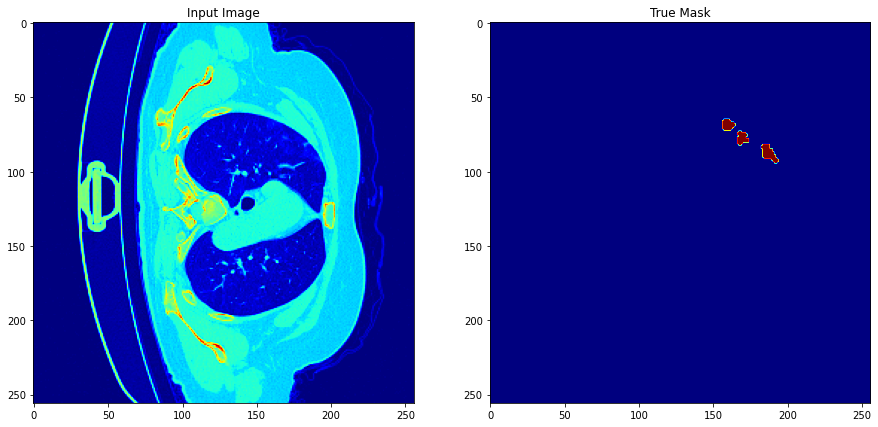

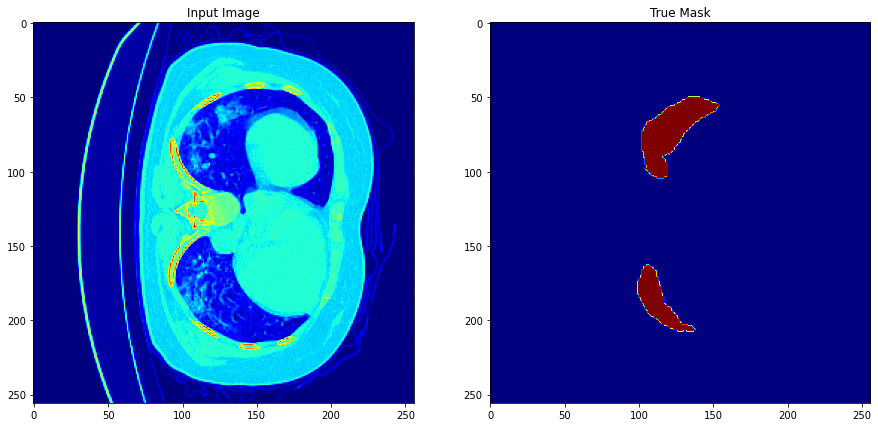

In [11]:
show_dataset(test_generator, 2)

In [12]:
train_images, mask = next(train_generator)

train_images.shape

(32, 256, 256, 1)

Next, I will define my UNet model according to the standard UNet architecture from the paper https://arxiv.org/pdf/1505.04597.pdf.

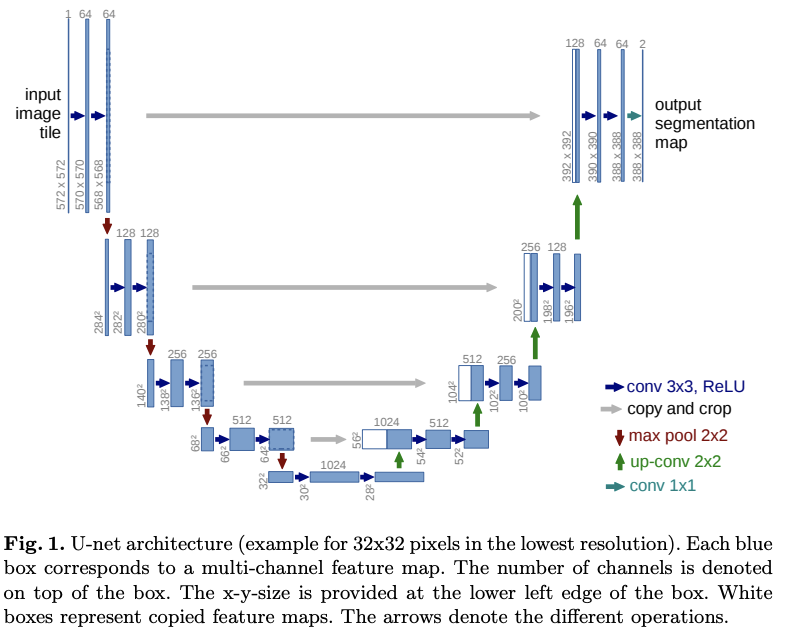

In [13]:
def unet(n_levels, initial_features=32, n_blocks=2, kernel_size=3, pooling_size=2, in_channels=1, out_channels=1):
    inputs = keras.layers.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, in_channels))
    x = inputs
    
    convpars = dict(kernel_size=kernel_size, activation='relu', padding='same')
    
    #downstream
    skips = {}
    for level in range(n_levels):
        for _ in range(n_blocks):
            x = keras.layers.Conv2D(initial_features * 2 ** level, **convpars)(x)
        if level < n_levels - 1:
            skips[level] = x
            x = keras.layers.MaxPool2D(pooling_size)(x)
            
    # upstream
    for level in reversed(range(n_levels-1)):
        x = keras.layers.Conv2DTranspose(initial_features * 2 ** level, strides=pooling_size, **convpars)(x)
        x = keras.layers.Concatenate()([x, skips[level]])
        for _ in range(n_blocks):
            x = keras.layers.Conv2D(initial_features * 2 ** level, **convpars)(x)
            
    # output
    activation = 'sigmoid' if out_channels == 1 else 'softmax'
    x = keras.layers.Conv2D(out_channels, kernel_size=1, activation=activation, padding='same')(x)
    
    return keras.Model(inputs=[inputs], outputs=[x], name=f'UNET-L{n_levels}-F{initial_features}')
        

I will next define some necessary parameters for training and compile the network.

In [14]:
EPOCH_STEP_TRAIN = NUM_TRAIN // BATCH_SIZE_TRAIN
EPOCH_STEP_TEST = NUM_TEST // BATCH_SIZE_TEST

model = unet(4)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Just printing out the summary to ensure the input and output dimensions are correct

In [15]:
model.summary()

Model: "UNET-L4-F32"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 32  320         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 32  9248        ['conv2d[0][0]']                 
                                )                                                       

Finally, I will move on to fitting the model.

In [16]:
history = model.fit_generator(generator=train_generator, 
                    steps_per_epoch=EPOCH_STEP_TRAIN, 
                    validation_data=test_generator, 
                    validation_steps=EPOCH_STEP_TEST,
                   epochs=NUM_OF_EPOCHS)

<ipython-input-16-f52164cccefe>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator=train_generator,


Epoch 1/100
63/63 [==============================] - 907s 14s/step - loss: 0.1356 - accuracy: 0.9778 - val_loss: 0.0345 - val_accuracy: 0.9927
Epoch 2/100
63/63 [==============================] - 36s 574ms/step - loss: 0.0279 - accuracy: 0.9936 - val_loss: 0.0307 - val_accuracy: 0.9923
Epoch 3/100
63/63 [==============================] - 36s 580ms/step - loss: 0.0214 - accuracy: 0.9936 - val_loss: 0.0216 - val_accuracy: 0.9928
Epoch 4/100
63/63 [==============================] - 37s 587ms/step - loss: 0.0136 - accuracy: 0.9935 - val_loss: 0.0167 - val_accuracy: 0.9925
Epoch 5/100
63/63 [==============================] - 38s 599ms/step - loss: 0.0115 - accuracy: 0.9943 - val_loss: 0.0179 - val_accuracy: 0.9927
Epoch 6/100
63/63 [==============================] - 38s 600ms/step - loss: 0.0088 - accuracy: 0.9968 - val_loss: 0.0160 - val_accuracy: 0.9941
Epoch 7/100
63/63 [==============================] - 38s 601ms/step - loss: 0.0081 - accuracy: 0.9970 - val_loss: 0.0129 - val_accuracy: 

I will save the model for later use.

In [17]:
saved_model_dir = os.path.join(data_dir, 'saved_models/')

model.save(os.path.join(saved_model_dir, f'UNET-ToothSegmentation_{IMAGE_HEIGHT}_{IMAGE_WIDTH}.h5'))

In [18]:
test_generator = create_segmentation_generator_test(data_dir_test_image, data_dir_test_mask, 1)

Found 557 validated image filenames.
Found 557 validated image filenames.


Just showing a few predictions

In [19]:
def show_prediction(datagen, num=1):
    for i in range(0,num):
        image,mask = next(datagen)
        pred_mask = model.predict(image)[0] > 0.5
        display([image[0], mask[0], pred_mask])

1/1 [==============================] - 0s 28ms/step


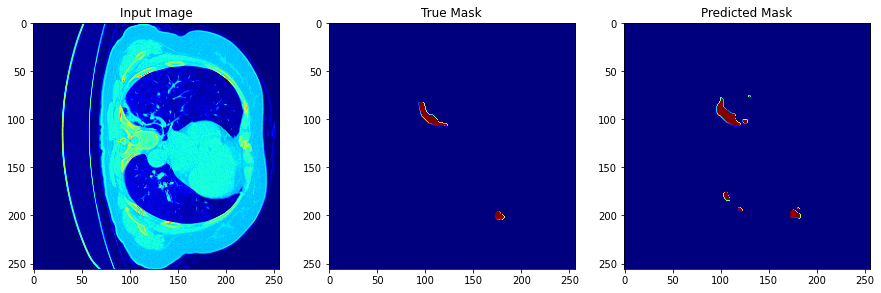

1/1 [==============================] - 0s 25ms/step


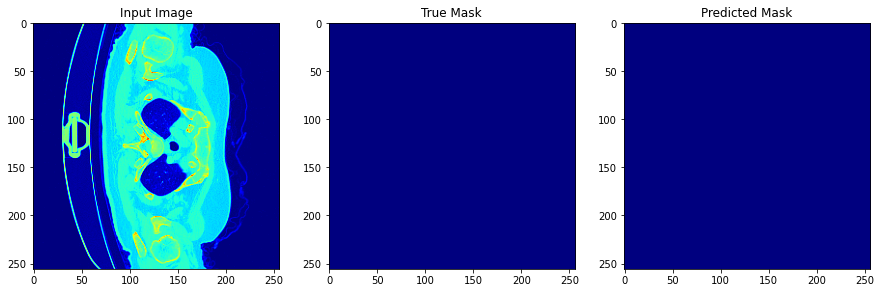

1/1 [==============================] - 0s 26ms/step


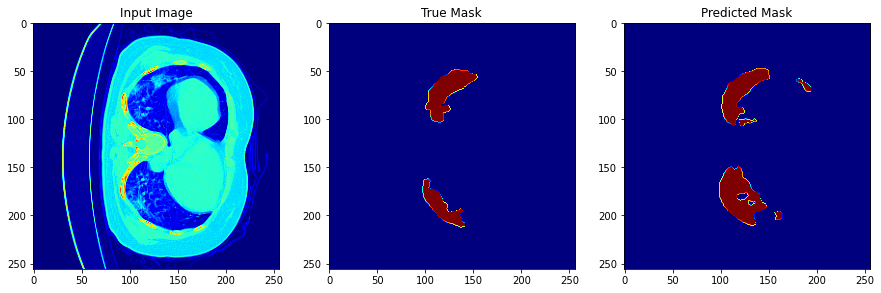

In [40]:
show_prediction(test_generator, 3)

In [29]:
history = model.history.history
history.keys()

dict_keys([])

In [25]:
loss = history.history['loss']

plt.plot(range(1,len(loss)+1),loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.show()

KeyError: ignored